In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [16]:
white_wine_new = pd.read_csv('C:/Users/raclo/Documents/Bootcamp/Project 2/Sprint 2/white_wine_modified.csv')
white_wine_new.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,alcohol_level,ph_level,wine_type
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium,low,low,white
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium,low,regular,white
2,2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium,regular,regular,white
3,3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium,low,regular,white
4,6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,medium,low,regular,white


In [17]:
white_wine_new.drop(columns=["Unnamed: 0", "alcohol_level","ph_level","wine_type", "quality"], inplace=True)

In [18]:
print(white_wine_new.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality_label'],
      dtype='object')


In [19]:
# white_wine_new.drop(columns=["sulphates"], inplace=True)

In [20]:
white_wine_new[['quality_label']].tail()

,quality_label
3956,medium
3957,low
3958,medium
3959,medium
3960,medium


In [21]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

oe = OrdinalEncoder(categories=[["low", "medium", "high"]], dtype=int) # this is how you can define the label order
white_wine_new['quality_label'] = oe.fit_transform(white_wine_new[['quality_label']])

white_wine_new[['quality_label']].head()

,quality_label
0,1
1,1
2,1
3,1
4,1


In [ ]:
# split data
from sklearn.model_selection import train_test_split

X = white_wine_new.drop('quality_label', axis=1)
y = white_wine_new['quality_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [89]:
# data normalisation with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

In [90]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# define model
LR_model = LogisticRegression(max_iter=15000)
# fit model
LR_model.fit(X_train_norm, y_train)
# make predictions
LR_preds = LR_model.predict(X_test_norm)

<Axes: ylabel='Feature'>

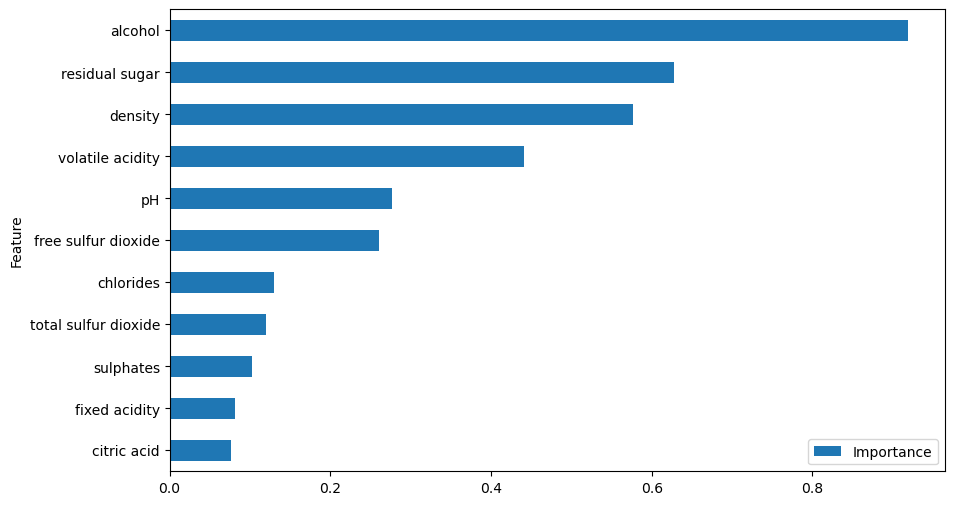

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)


coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

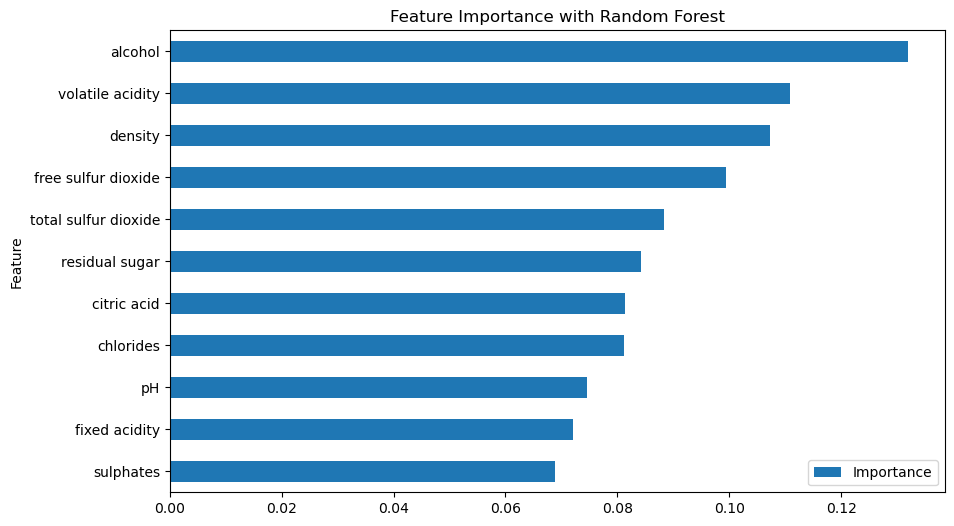

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # Standardize the data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

# Plot feature importance
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title('Feature Importance with Random Forest')
plt.show()


In [93]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# define model
# RF_clf = RandomForestClassifier(criterion='entropy', 
#                                 max_depth=80, 
#                                 max_features=1, 
#                                 min_samples_leaf=3,
#                                 min_samples_split=6,
#                                 n_estimators=110,
#                                 random_state=42)
RF_clf = RandomForestClassifier(random_state=42)
# fit model
RF_clf.fit(X_train_norm, y_train)
# make predictions
RF_preds = RF_clf.predict(X_test_norm)

In [94]:
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
# define model
BER_clf = BernoulliNB()
# fit model
BER_clf.fit(X_train_norm, y_train)
# make predictions
BER_preds = BER_clf.predict(X_test_norm)

In [95]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# define model
DTC_clf = DecisionTreeClassifier(random_state=42)
# fit model
DTC_clf.fit(X_train_norm, y_train)
# make predictions
DTC_preds = DTC_clf.predict(X_test_norm)

In [96]:
# Support Vector Classifier
from sklearn.svm import SVC
# define model
SVC_clf = SVC(kernel='rbf', C=1, gamma='scale')
# fit model
SVC_clf.fit(X_train_norm, y_train)
# make predictions
SVC_preds = SVC_clf.predict(X_test_norm)

In [97]:
from sklearn.metrics import accuracy_score 

# check overall accuracy %
LR_acc = accuracy_score(y_test, LR_preds)
RF_acc = accuracy_score(y_test, RF_preds)
BER_acc = accuracy_score(y_test, BER_preds)
DTC_acc = accuracy_score(y_test, DTC_preds)
SVC_acc = accuracy_score(y_test, SVC_preds)

print("Logistic Regression: ", LR_acc, "\nRandom Forest: ", RF_acc, "\nBernoulliNB: ", 
    BER_acc, "\nDecisionTreeClassifier :",DTC_acc, "\nSupport Vector Classifier: ",SVC_acc)

'''
Sulphates & Fixed Acidity removed:
Logistic Regression:  0.7089991589571069 
Random Forest:  0.7258200168208578 
BernoulliNB:  0.6215306980656014 
DecisionTreeClassifier : 0.6173254835996635 
Support Vector Classifier:  0.7165685449957948'
'''

'''
Sulphates removed - test size = 0.3:
Logistic Regression:  0.7098402018502944 
Random Forest:  0.7283431455004206 
BernoulliNB:  0.6215306980656014 
DecisionTreeClassifier : 0.6324642556770396 
Support Vector Classifier:  0.7216148023549201
'''

'''
No features removed - test size = 0.3:
Logistic Regression:  0.7089991589571069 
Random Forest:  0.7342304457527334 
BernoulliNB:  0.6215306980656014 
DecisionTreeClassifier : 0.6476030277544155 
Support Vector Classifier:  0.7249789739276703
'''

'''
No features removed - test size = 0.3 - new parameters:
Logistic Regression:  0.7089991589571069 
Random Forest:  0.7375946173254836 
BernoulliNB:  0.6215306980656014 
DecisionTreeClassifier : 0.6476030277544155 
Support Vector Classifier:  0.7249789739276703'
'''

'''
No features removed - test size = 0.3 - no parameters:'
'Logistic Regression:  0.7089991589571069 
Random Forest:  0.7426408746846089 
BernoulliNB:  0.6215306980656014 
DecisionTreeClassifier : 0.6476030277544155 
Support Vector Classifier:  0.7249789739276703'
'''

Logistic Regression:  0.7089991589571069 
Random Forest:  0.7426408746846089 
BernoulliNB:  0.6215306980656014 
DecisionTreeClassifier : 0.6476030277544155 
Support Vector Classifier:  0.7249789739276703


"\nNo features removed - test size = 0.3 - no parameters:'\n'Logistic Regression:  0.7089991589571069 \nRandom Forest:  0.7426408746846089 \nBernoulliNB:  0.6215306980656014 \nDecisionTreeClassifier : 0.6476030277544155 \nSupport Vector Classifier:  0.7249789739276703'\n"

## Test Overfitting

In [98]:


from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [99]:


model = RandomForestClassifier()
model.fit(X_train_norm, y_train)
print('Training Accuracy : ', 
      metrics.accuracy_score(y_train,
                             model.predict(X_train_norm))*100)
print('Validation Accuracy : ', 
      metrics.accuracy_score(y_test, 
                             model.predict(X_test_norm))*100)


Training Accuracy :  100.0
Validation Accuracy :  72.91841883936081


In [80]:
model = LogisticRegression()
model.fit(X_train_norm, y_train)
print('Training Accuracy : ', 
      metrics.accuracy_score(y_train,
                             model.predict(X_train_norm))*100)
print('Validation Accuracy : ', 
      metrics.accuracy_score(y_test, 
                             model.predict(X_test_norm))*100)

Training Accuracy :  72.07792207792207
Validation Accuracy :  70.89991589571069


In [100]:
model = BernoulliNB()
model.fit(X_train_norm, y_train)
print('Training Accuracy : ', 
      metrics.accuracy_score(y_train,
                             model.predict(X_train_norm))*100)
print('Validation Accuracy : ', 
      metrics.accuracy_score(y_test, 
                             model.predict(X_test_norm))*100)

Training Accuracy :  63.02308802308802
Validation Accuracy :  62.15306980656013


In [101]:
model = DecisionTreeClassifier()
model.fit(X_train_norm, y_train)
print('Training Accuracy : ', 
      metrics.accuracy_score(y_train,
                             model.predict(X_train_norm))*100)
print('Validation Accuracy : ', 
      metrics.accuracy_score(y_test, 
                             model.predict(X_test_norm))*100)

Training Accuracy :  100.0
Validation Accuracy :  63.666947014297726


In [102]:
model = SVC()
model.fit(X_train_norm, y_train)
print('Training Accuracy : ', 
      metrics.accuracy_score(y_train,
                             model.predict(X_train_norm))*100)
print('Validation Accuracy : ', 
      metrics.accuracy_score(y_test, 
                             model.predict(X_test_norm))*100)

Training Accuracy :  75.57720057720057
Validation Accuracy :  72.49789739276703


In [75]:


from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


## SMOTE - Test 2

In [2]:
# pip install imbalanced-learn

In [3]:
# # Import necessary libraries
# from imblearn.over_sampling import SMOTE
# from sklearn.ensemble import RandomForestClassifier

# # Initialize SMOTE
# smote = SMOTE(random_state=42)

# # Apply SMOTE to the training data
# X_train_smote, y_train_smote = smote.fit_resample(X_train_norm, y_train)

# # Define and train the Random Forest model
# RF_clf = RandomForestClassifier(random_state=42)
# RF_clf.fit(X_train_smote, y_train_smote)

# # Make predictions
# RF_preds = RF_clf.predict(X_test_norm)

In [4]:
# from sklearn.metrics import accuracy_score

# # Calculate accuracy
# accuracy = accuracy_score(y_test, RF_preds)
# print(f"Accuracy Score: {accuracy:.2f}")

In [5]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# # Generate the confusion matrix
# conf_matrix = confusion_matrix(y_test, RF_preds)

# # Set custom figure size
# plt.figure(figsize=(8, 5))

# # Display the confusion matrix with custom labels
# disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['low', 'medium', 'high'])
# disp.plot(cmap="Blues", ax=plt.gca())  # Use plt.gca() to plot on the same figure

# # Updated title with best capitalization
# plt.title("Confusion Matrix After Applying SMOTE")
# plt.show()

In [525]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("\nConfusion Matrix - Logistic Regression:")
print(confusion_matrix(y_test, LR_preds))

print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, LR_preds,zero_division=0))


Confusion Matrix - Logistic Regression:
[[219 193   0]
 [116 624   0]
 [  2  35   0]]

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.65      0.53      0.58       412
           1       0.73      0.84      0.78       740
           2       0.00      0.00      0.00        37

    accuracy                           0.71      1189
   macro avg       0.46      0.46      0.46      1189
weighted avg       0.68      0.71      0.69      1189



In [526]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("\nConfusion Matrix - Random Forest:")
print(confusion_matrix(y_test, RF_preds))

print("\nClassification Report - Random Forest:")
print(classification_report(y_test, RF_preds,zero_division=0))


Confusion Matrix - Random Forest:
[[254 158   0]
 [110 628   2]
 [  0  36   1]]

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.70      0.62      0.65       412
           1       0.76      0.85      0.80       740
           2       0.33      0.03      0.05        37

    accuracy                           0.74      1189
   macro avg       0.60      0.50      0.50      1189
weighted avg       0.73      0.74      0.73      1189



In [527]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("\nConfusion Matrix - BernoulliNB:")
print(confusion_matrix(y_test, BER_preds))

print("\nClassification Report - BernoulliNB:")
print(classification_report(y_test, BER_preds,zero_division=0))


Confusion Matrix - BernoulliNB:
[[  4 408   0]
 [  5 735   0]
 [  0  37   0]]

Classification Report - BernoulliNB:
              precision    recall  f1-score   support

           0       0.44      0.01      0.02       412
           1       0.62      0.99      0.77       740
           2       0.00      0.00      0.00        37

    accuracy                           0.62      1189
   macro avg       0.36      0.33      0.26      1189
weighted avg       0.54      0.62      0.48      1189



In [528]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("\nConfusion Matrix - DecisionTreeClassifier:")
print(confusion_matrix(y_test, DTC_preds))

print("\nClassification Report - DecisionTreeClassifier:")
print(classification_report(y_test, DTC_preds,zero_division=0))


Confusion Matrix - DecisionTreeClassifier:
[[234 178   0]
 [177 532  31]
 [  2  31   4]]

Classification Report - DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.57      0.57      0.57       412
           1       0.72      0.72      0.72       740
           2       0.11      0.11      0.11        37

    accuracy                           0.65      1189
   macro avg       0.47      0.46      0.47      1189
weighted avg       0.65      0.65      0.65      1189



In [529]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("\nConfusion Matrix - Support Vector Classifier:")
print(confusion_matrix(y_test, SVC_preds))

print("\nClassification Report - Support Vector Classifier:")
print(classification_report(y_test, SVC_preds,zero_division=0))



Confusion Matrix - Support Vector Classifier:
[[225 187   0]
 [103 637   0]
 [  1  36   0]]

Classification Report - Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.68      0.55      0.61       412
           1       0.74      0.86      0.80       740
           2       0.00      0.00      0.00        37

    accuracy                           0.72      1189
   macro avg       0.47      0.47      0.47      1189
weighted avg       0.70      0.72      0.71      1189



In [530]:
from sklearn.metrics import confusion_matrix

cm_LR = confusion_matrix(y_test, LR_preds)
cm_RF = confusion_matrix(y_test, RF_preds)
cm_BER = confusion_matrix(y_test, BER_preds)
cm_DTC = confusion_matrix(y_test, DTC_preds)
cm_SVC = confusion_matrix(y_test, SVC_preds)


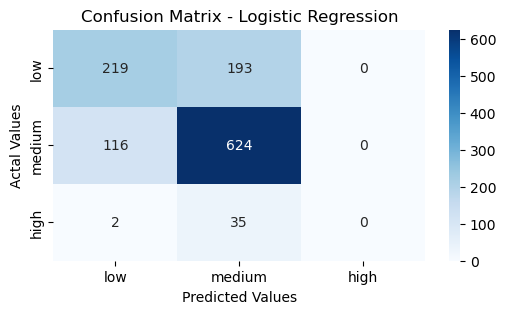

In [531]:
cm_LR_white_wine_new = pd.DataFrame(cm_LR,
                    index = ['low','medium','high'], 
                    columns = ['low','medium','high'])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(6,3))
sns.heatmap(cm_LR_white_wine_new, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

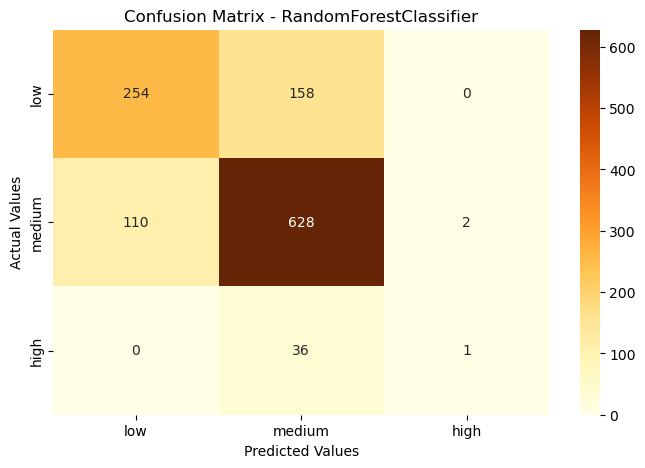

In [589]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_LR_white_wine_new = pd.DataFrame(cm_RF,
                    index = ['low','medium','high'], 
                    columns = ['low','medium','high'])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(cm_LR_white_wine_new, annot=True, fmt='d', cmap='YlOrBr')
plt.title('Confusion Matrix - RandomForestClassifier')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

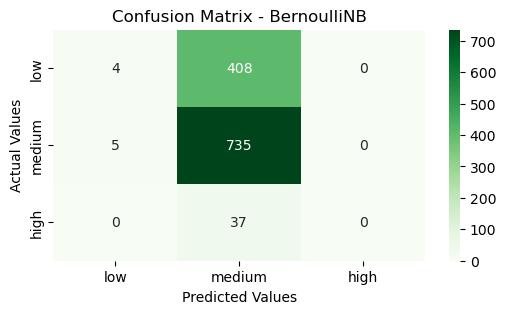

In [584]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_LR_white_wine_new = pd.DataFrame(cm_BER,
                    index = ['low','medium','high'], 
                    columns = ['low','medium','high'])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(6,3))
sns.heatmap(cm_LR_white_wine_new, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - BernoulliNB')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

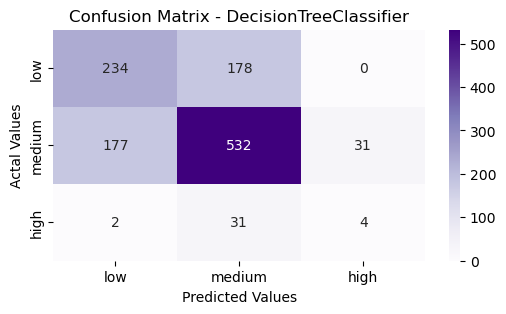

In [534]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_LR_white_wine_new = pd.DataFrame(cm_DTC,
                    index = ['low','medium','high'], 
                    columns = ['low','medium','high'])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(6,3))
sns.heatmap(cm_LR_white_wine_new, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - DecisionTreeClassifier')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

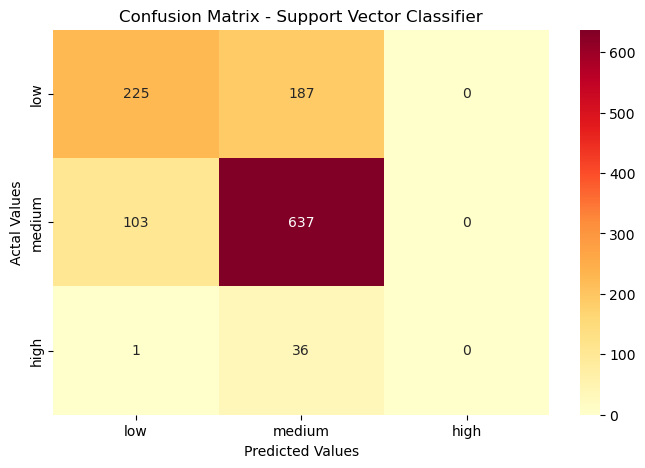

In [588]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_LR_white_wine_new = pd.DataFrame(cm_SVC,
                    index = ['low','medium','high'], 
                    columns = ['low','medium','high'])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(cm_LR_white_wine_new, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Confusion Matrix - Support Vector Classifier')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## Cohen's Kappa Coefficient

In [536]:
# Result for Logistic Regression
from sklearn.metrics import cohen_kappa_score
print(f'Logistic Regression:',cohen_kappa_score(y_test, LR_preds))
print(f'RandomForestClassifier:',cohen_kappa_score(y_test, RF_preds))
print(f'BernoulliNB:',cohen_kappa_score(y_test, BER_preds))
print(f'DecisionTreeClassifier:',cohen_kappa_score(y_test, DTC_preds))
print(f'Support Vector Classifier:',cohen_kappa_score(y_test, SVC_preds))

Logistic Regression: 0.36158299930012083
RandomForestClassifier: 0.4448350682523553
BernoulliNB: 0.003284197662873245
DecisionTreeClassifier: 0.28207311976712357
Support Vector Classifier: 0.39417364083562245


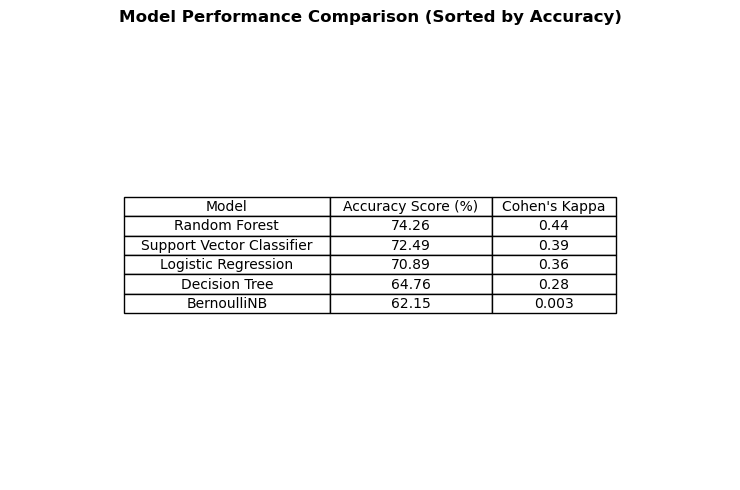

In [578]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the provided information
data = {
    'Model': [
        'Logistic Regression', 
        'Random Forest', 
        'BernoulliNB', 
        'Decision Tree', 
        'Support Vector Classifier'
    ],
    'Accuracy Score (%)': [
        70.89, 
        74.26, 
        62.15, 
        64.76, 
        72.49
    ],
    "Cohen's Kappa": [
        0.36, 
        0.44, 
        0.003, 
        0.28, 
        0.39
    ]
}

df = pd.DataFrame(data)

# Sort by 'Accuracy Score (%)' in descending order
df = df.sort_values(by='Accuracy Score (%)', ascending=False)

# Plot the sorted table
fig, ax = plt.subplots(figsize=(8, 5))
ax.axis('off')  # Hide axes
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df.columns))))

# Remove whitespace around the table
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

plt.title('Model Performance Comparison (Sorted by Accuracy)', fontsize=12, fontweight='bold')
plt.show()


## GridSearchCV

In [537]:
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from scipy.stats import randint

# # Initialize Random Forest
# rf = RandomForestClassifier()

# # Moderately expanded Grid Search Space
# grid_space = {
#     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90,100, None],        # Moderately more options
#     'n_estimators': [50, 100, 200, 300],        # Expanded range
#     'max_features': [3, 5, 7, 'sqrt'],          # Added options
#     'min_samples_leaf': [1, 2, 3],              # Slightly expanded
#     'min_samples_split': [2, 3, 4],             # Slightly expanded
# }

# # Run Grid Search with moderate options and cv=3
# grid = GridSearchCV(rf, param_grid=grid_space, cv=3, scoring='accuracy', n_jobs=-1)
# model_grid = grid.fit(X, y)
# print('Best grid search hyperparameters are:', model_grid.best_params_)
# print('Best grid search score is:', model_grid.best_score_)

# # Moderately expanded Random Search Space
# rs_space = {
#     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90,100, None],                 # Expanded options
#     'n_estimators': np.arange(50, 400, step=50),          # Expanded range
#     'max_features': randint(2, 8),                        # Expanded range
#     'criterion': ['gini', 'entropy'],
#     'min_samples_leaf': randint(1, 4),                   # Slightly expanded
#     'min_samples_split': np.arange(2, 8, step=2),        # Expanded range
# }

# # Run Randomized Search with n_iter=100 and cv=3
# rf_random = RandomizedSearchCV(rf, rs_space, n_iter=100, scoring='accuracy', n_jobs=-1, cv=3)
# model_random = rf_random.fit(X, y)
# print('Best random search hyperparameters are:', model_random.best_params_)
# print('Best random search score is:', model_random.best_score_)